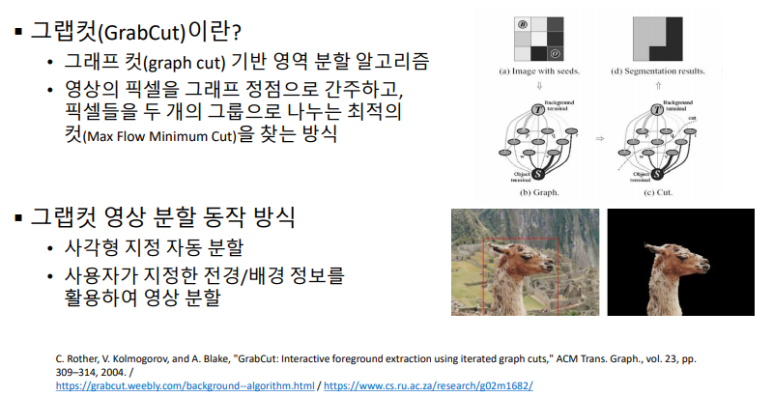 
영역 분할 알고리즘으로서 영상의 픽셀그룹을 객체롸 배경으로 분할하는 것임니다.  
이때 픽셀과 픽셀간에 어떻게 정의를 할 것인지 방법을 잘 정의해서 분할하는 알고리즘 이라고 할 수 있겠습니다.

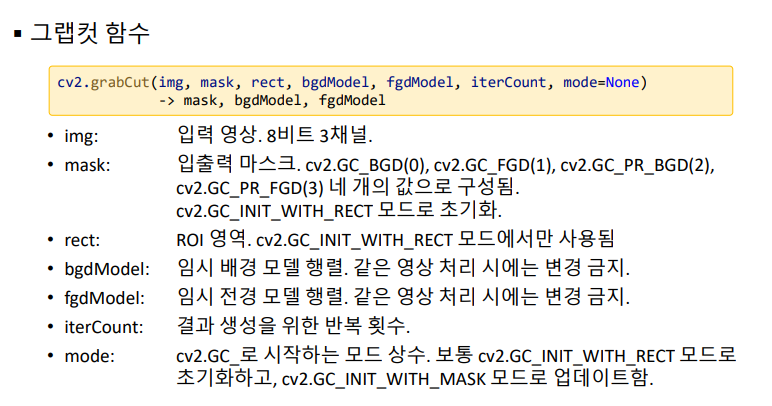
그랩 컷 또한 OpenCV에서 함수로 제공해 줍니다.  
여기서 마스크는 좀 다릅니다. 0,1,2,3 까지 네개의 값으로 구성됐으며, 프로그램 안에서 계속 업데이트 될 수 있는 방식으로 사용됩니다. 백그라운드,포그라운드,배경일것같은,아마도 전경일거같은 이렇게 네개로 구성된다.

In [1]:

import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

In [2]:
src=cv2.imread('nemo.jpg')

In [3]:
if src is None:

    print('Image load failed!')

    sys.exit()

ROI 창이 뜨면 여기서 초기치 위치를 지정할 수 있습니다.  간단한 사각형을 지정할 때에는 이게 편합니다. 이걸 사용하지 않으면 마우스 콜백함수를 직접 만들어 주어야하는데 그에 비하면 이게 훨씬 낫죠. 이 rc값은 x,y,width,height의 튜플값으로 받게 됩니다.

In [4]:
rc=cv2.selectROI(src)

마스크영상은 검정색으로 채워져있으며, 입력영상과 동일한 크기로 만들어 줍니다. 이것을 grapCut 함수의 두번째 인자로 줄 것입니다.

In [5]:
mask=np.zeros(src.shape[:2],np.uint8)

None 자리는 Back,Forward Ground 이다. 하지만 안줘도 내부에서 자동으로 주며, 업데이트 하고 싶다면 강제적으로 줄 수있다. 또한 숫자 5는 iteration 횟수를 뜻한다.

In [6]:
cv2.grabCut(src,mask,rc,None,None,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[4.17809492e-01, 2.19849257e-01, 8.83123358e-02, 9.54354568e-02,
         1.78593458e-01, 3.79848220e+01, 3.83278291e+01, 2.62228368e+01,
         4.82770336e+01, 5.86764802e+01, 3.74357476e+01, 4.46960245e+01,
         9.41449553e+01, 1.15055973e+02, 4.43200673e+01, 7.16122892e+01,
         6.95283545e+01, 6.81585683e+01, 8.93578255e+01, 5.69998581e+01,
         2.43699576e+01, 2.55543170e+01, 1.83942289e+01, 2.55543170e+01,
         3.02975517e+01, 1.88548495e+01, 1.83942289e+01, 1.88548495e+01,
         3.00456690e+01, 5.74274897e+01, 2.02205135e+01, 7.46949790e+00,
         2.02205135e+01, 8.32284441e+01, 4.47109713e+01, 7.46949790e+00,
         4.47109713e+01, 4.80651156e+01, 1.70049779e+02, 1.74231117e+02,
         1.96899137e+02, 1.74231117e+02, 2.0

0:cv2.GC_BGD,2:cv2.GC_PR_BGD 즉, BackGround와 BackGround 일거같은거는 0으로 지정해주고 아닌것은 1로 지정해 줍니다. 
- np.where은 조건문이라고 보셔도 됩니다. 첫번째 파라미터가 True면 두번째 파라미터로, False면 세번째 파라미터로 지정됩니다.  
즉 mask2는 0또는 1이 됩니다.

In [7]:
mask2=np.where((mask==0)|(mask==2),0,1).astype('uint8')

#이 0 또는 1값을 갖는 mask2를 src와 곱하는 행렬입니다.
dst=src*mask2[:,:,np.newaxis]

mask=mask*64

#dst=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

#plt.subplot(121),plt.axis('off'),plt.imshow(mask,cmap='gray')
#plt.axis('off'),plt.imshow(dst)

cv2.imshow('mask',mask)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

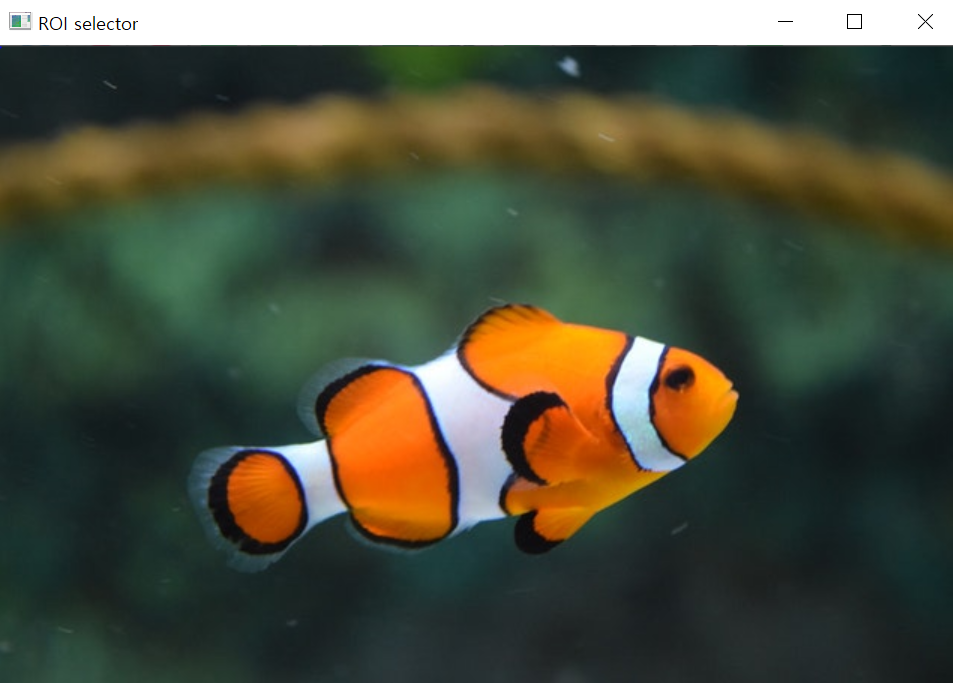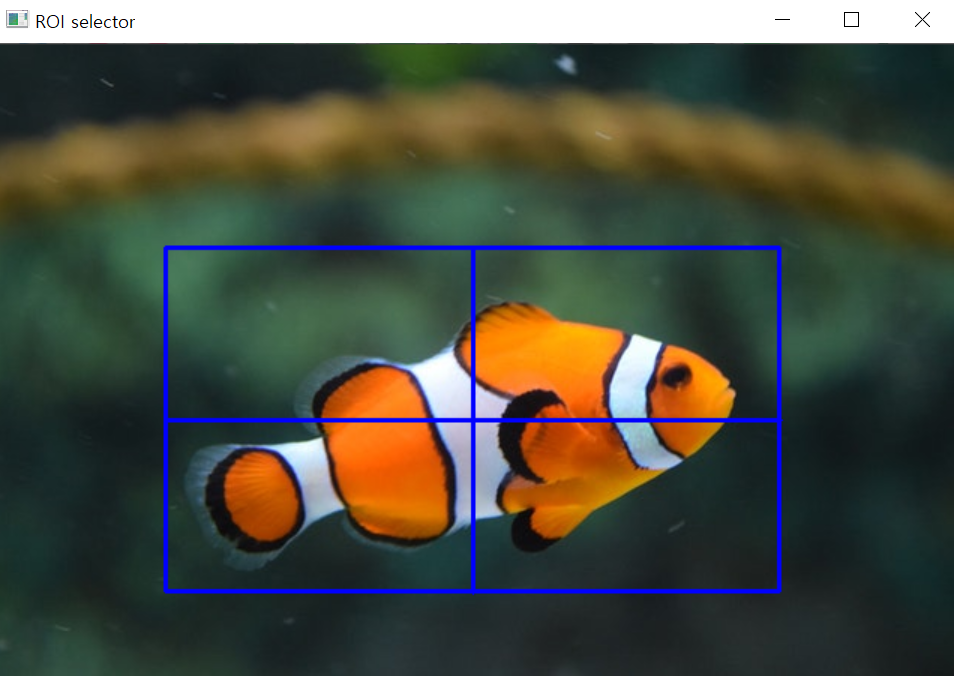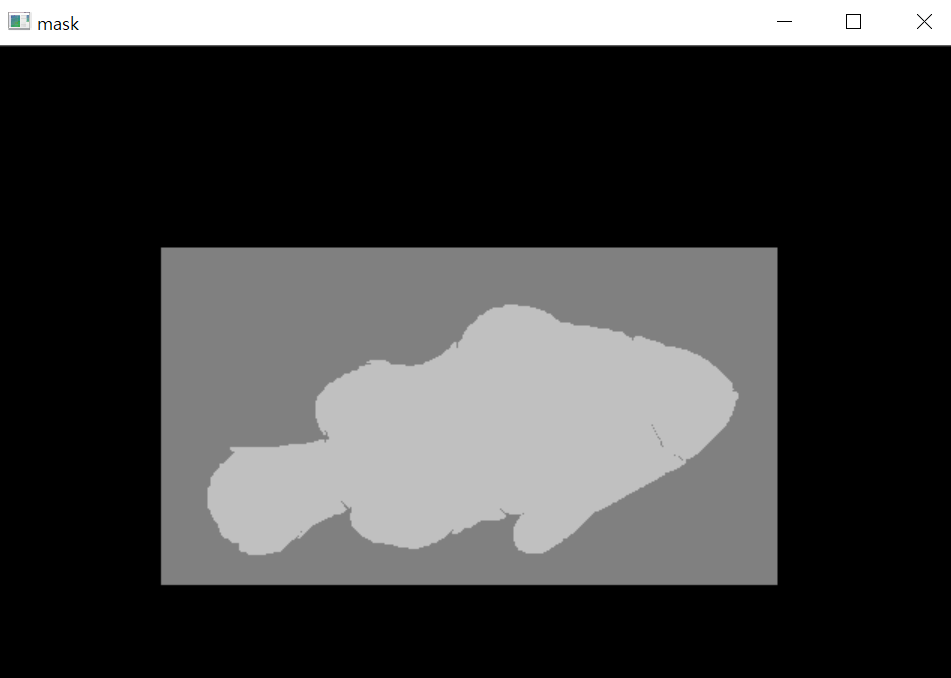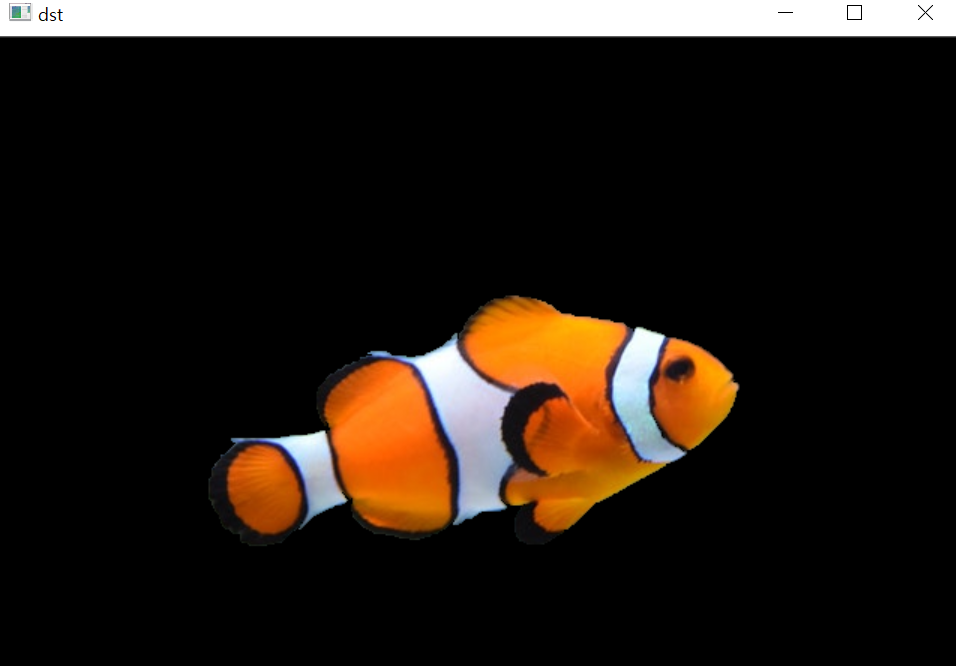